In [103]:
import pandas as pd
import numpy as np

def load_csv(route):
    data = pd.read_csv(route)
    data = data[data.columns[1:]]
    data["Time stamp"] = data["Time stamp"].astype(int)
    data = data.set_index(data["File name"] + data["Time stamp"].astype(str))
    return data

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [105]:
den_train = load_csv("/Users/harmonialeo/Downloads/gen4_train_density2.csv")
den_val = load_csv("/Users/harmonialeo/Downloads/gen4_val_density2.csv")
den_test = load_csv("/Users/harmonialeo/Downloads/gen4_test_density2.csv")

In [106]:
den_all = den_train.append(den_val).append(den_test)

<AxesSubplot:xlabel='Density diff', ylabel='Density'>

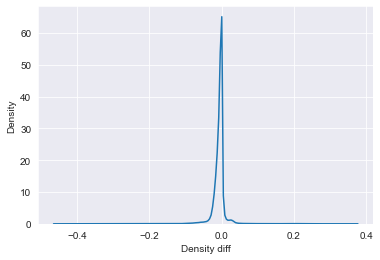

In [107]:
den_all["Density diff"] = den_all["Density positive"] - den_all["Density negative"]
sns.kdeplot(den_all["Density diff"])

In [108]:
den_all["type"] = np.where(
    ((den_all["Density positive"] - den_all["Density negative"]) > (den_all["Density positive"] - den_all["Density negative"]).quantile(0.995))|
    ((den_all["Density positive"] - den_all["Density negative"]) < (den_all["Density positive"] - den_all["Density negative"]).quantile(0.005)),6, 0)

In [109]:
den_ineff = den_all[["Density ineffective"]][(den_all["type"]==0)&(den_all["Density ineffective"]>0)]
den_eff = den_all[["Density effective"]][(den_all["type"]==0)&(den_all["Density effective"]>0)]

No handles with labels found to put in legend.


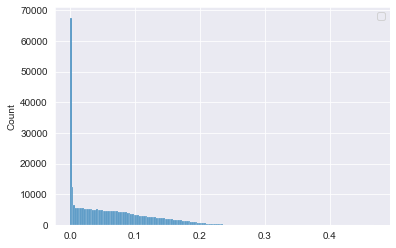

In [110]:
sns.histplot(den_ineff)
plt.legend()

No handles with labels found to put in legend.


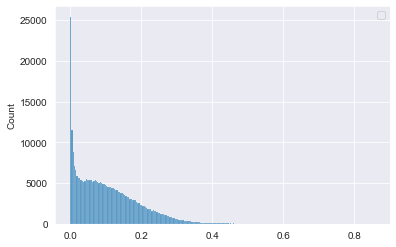

In [111]:
sns.histplot(den_eff)
plt.legend()

In [112]:
alpha = 0
beta = 0
#sigma = 0.75

In [113]:
from pomegranate import *

np.random.seed(0)
model = GeneralMixtureModel.from_samples([GammaDistribution], 2, den_ineff)
model

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "IndependentComponentsDistribution",
            "parameters" : [
                [
                    {
                        "class" : "Distribution",
                        "name" : "GammaDistribution",
                        "parameters" : [
                            1.8705030978060613,
                            23.486341574169387
                        ],
                        "frozen" : false
                    }
                ],
                [
                    1.0
                ]
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "IndependentComponentsDistribution",
            "parameters" : [
                [
                    {
                        "class" : "Distribution",
                        "name" : "GammaDistribution",
                   

/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

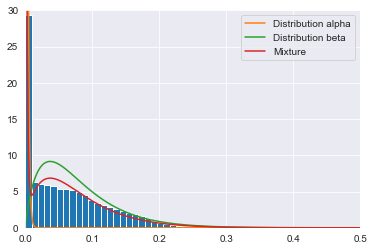

In [114]:
plt.hist(den_ineff, bins=50, density=True, stacked=True)
x = np.arange(0,1.0,0.001)
sns.lineplot(x, model.distributions[1].probability(x[:,None]), label="Distribution alpha")
sns.lineplot(x, model.distributions[0].probability(x[:,None]), label="Distribution beta")
sns.lineplot(x, model.probability(x[:,None]), label="Mixture")
# sns.lineplot(den_eff, model3.distributions[0].probability(den_eff), label="Distribution 1")
# sns.lineplot(den_eff, model3.distributions[1].probability(den_eff), label="Distribution 2")
# sns.lineplot(den_eff, model3.probability(den_eff), label="Mixture")
plt.legend()
plt.ylim((0,30))
plt.xlim((0,0.5))
plt.show()

In [115]:
model2 = GeneralMixtureModel.from_samples([GammaDistribution], 2, den_eff)
model2

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "IndependentComponentsDistribution",
            "parameters" : [
                [
                    {
                        "class" : "Distribution",
                        "name" : "GammaDistribution",
                        "parameters" : [
                            3.41874552181307,
                            23.25579478398224
                        ],
                        "frozen" : false
                    }
                ],
                [
                    1.0
                ]
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "IndependentComponentsDistribution",
            "parameters" : [
                [
                    {
                        "class" : "Distribution",
                        "name" : "GammaDistribution",
                      

/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

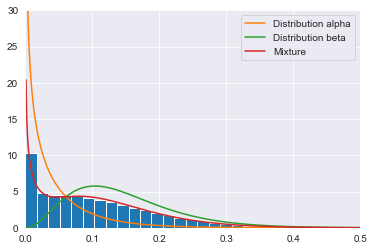

In [116]:
plt.hist(den_eff, bins=50, density=True, stacked=True)
x = np.arange(0,1.0,0.001)
sns.lineplot(x, model2.distributions[1].probability(x[:,None]), label="Distribution alpha")
sns.lineplot(x, model2.distributions[0].probability(x[:,None]), label="Distribution beta")
sns.lineplot(x, model2.probability(x[:,None]), label="Mixture")
# sns.lineplot(den_eff, model3.distributions[0].probability(den_eff), label="Distribution 1")
# sns.lineplot(den_eff, model3.distributions[1].probability(den_eff), label="Distribution 2")
# sns.lineplot(den_eff, model3.probability(den_eff), label="Mixture")
plt.legend()
plt.ylim((0,30))
plt.xlim((0,0.5))
plt.show()

In [117]:
labels1 = (model.predict_proba(den_all[["Density ineffective"]]).argmax(axis=1))
print(den_all[(labels1==1)]["Density ineffective"].max())
labels2 = (model2.predict_proba(den_all[["Density effective min"]]).argmax(axis=1))
labels3 = (model2.predict_proba(den_all[["Density effective max"]]).argmax(axis=1))
labels0 = (model2.predict_proba(den_all[["Density effective"]]).argmax(axis=1))
print(den_all[(labels0==1)]["Density effective"].max())

0.0063566551543772
0.0509471148252487


In [118]:
den_all["type"] = np.where((labels1==1)&(labels2==0)&(den_all["type"]==0), 1, den_all["type"])
den_all["type"] = np.where((labels1==0)&(labels2==0)&(den_all["type"]==0), 2, den_all["type"])
den_all["type"] = np.where((labels1==1)&(labels2==1)&(labels3==0)&(den_all["type"]==0), 3, den_all["type"])
den_all["type"] = np.where((labels1==1)&(labels2==1)&(labels3==1)&(den_all["type"]==0), 4, den_all["type"])
den_all["type"] = np.where((labels1==0)&(labels2==1)&(den_all["type"]==0), 5, den_all["type"])

In [119]:
den_all["type"] = np.where(den_all["type"]==1, "sub-scene 1", den_all["type"])
den_all["type"] = np.where(den_all["type"]=="2", "sub-scene 2", den_all["type"])
den_all["type"] = np.where(den_all["type"]=="3", "sub-scene 3", den_all["type"])
den_all["type"] = np.where(den_all["type"]=="4", "sub-scene 4", den_all["type"])
den_all["type"] = np.where(den_all["type"]=="5", "sub-scene 5", den_all["type"])
den_all["type"] = np.where(den_all["type"]=="6", "sub-scene 6", den_all["type"])
color = {"sub-scene 1":"orange","sub-scene 2":"red","sub-scene 3":"c","sub-scene 4":'#1f77b4',"sub-scene 5":"m","sub-scene 6":"purple","sub-scene 7":"black"}

([<matplotlib.patches.Wedge at 0x7face73c5f40>,
 [Text(0.12922576243603337, 1.0923830382804496, 'sub-scene 5'),
  Text(-0.8902712664110373, -0.6460782245230744, 'sub-scene 2'),
  Text(-0.053128425617746784, -1.0987162374295647, 'sub-scene 6'),
  Text(0.5816050910221354, -0.9336677771547724, 'sub-scene 3'),
  Text(1.0722735949678381, -0.24541666107815227, 'sub-scene 4'),
  Text(1.0999854157828237, -0.005664368021985721, 'sub-scene 1')])

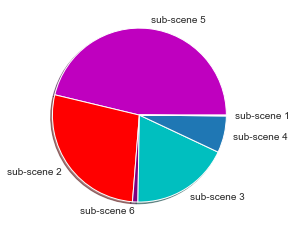

In [120]:
typs = den_all["type"].unique()
plt.pie([(den_all["type"]==typ).sum() for typ in typs],labels=typs,colors=[color[typ] for typ in typs],shadow=True)